# IMPORTANCE OF OPTIMUM BANDWIDTH

In this chapter notebook we investigate how important it is to find the optimum bandwidth in kernel regression. We will also see that kernel regression is very robust to noisy data. We know that finding optimum bandwidth or gamma value is more important than the choice of the kernel. In this notebook we will fit kernel regressors with both rbf and Laplacian kernels on damped harmonic oscillator sequence. We will investigate model fits of kernel regressors having different bandwidths and notice there is an optimum bandwidth. To make things interesting we will inject some noise to training data.

**Append the directory of m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import necessary packages and modules**

In [2]:
import numpy as np
np.random.seed(0)
import pandas as pd
from m_learn.kernel_regression import kernel_regressor
from m_learn.utility.data_preprocessing import get_xy_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Generate a harmonic oscillator sequence

### 1.1 A function which generates harmonic oscillator sequence

In [3]:
def oscilator_data_generator(amplitude, zeta, w, phase, x):    
    '''
    A function which generates an damped harmonic oscillator sequence
    '''
    # input x
    x = np.array(x)
    # frequency * input
    wx = w*x
    # compute the damping term
    damping_term = amplitude*np.exp(-zeta*x)
    # compute the sinusoid argument
    argument = wx
    argument -= phase
    # compute the sinusoid term
    sinuisoid = np.sin(argument)
    # compute the osciallor sequence
    sequence = damping_term*sinuisoid
    # return the sequence data
    return sequence

### 1.2 Generating an oscillatory sequence

**Oscillator parameters**

In [4]:
amplitude = 10
zeta = .3
w = 2*np.pi*1
phase = 0

**Generate the x & y values for the sequence**

In [5]:
x = np.linspace(0, 2*np.pi, 1000)
y = oscilator_data_generator(amplitude, zeta, w, phase, x)

**Store the data in a pandas dataframe**

In [6]:
data = pd.DataFrame({"x":x,"y":y})

**Plot of the data**

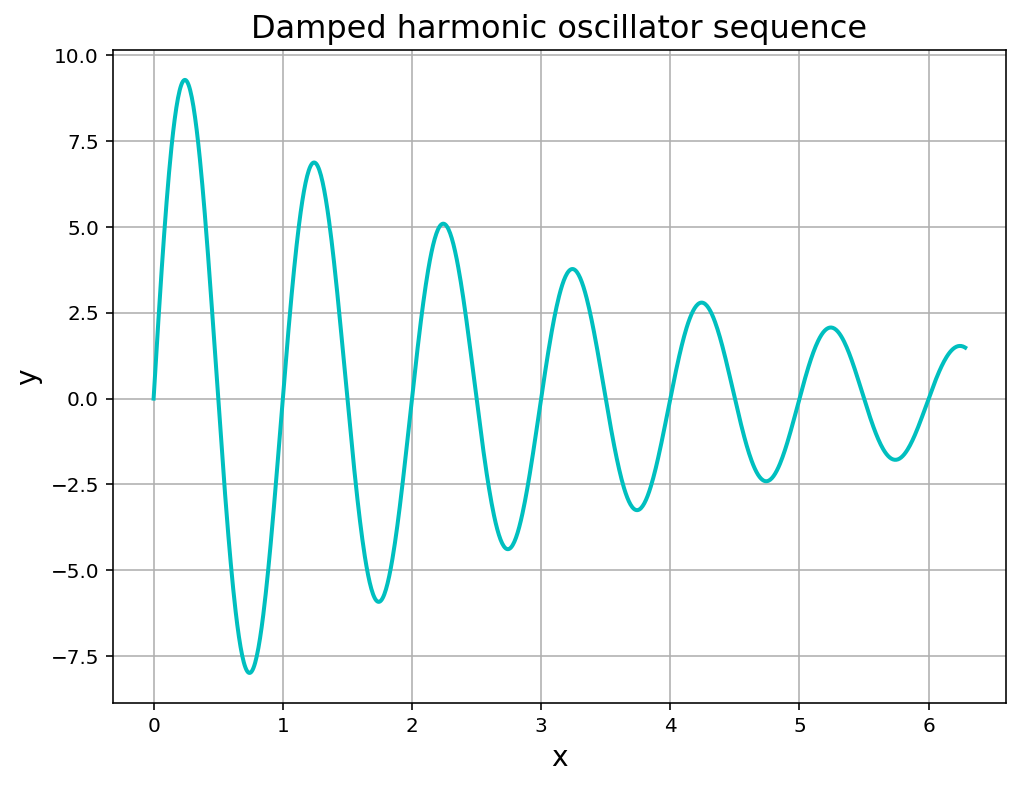

In [7]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(data.x,data.y,linewidth =2, color = 'c')
plt.title("Damped harmonic oscillator sequence", fontsize = 16)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.grid()
plt.show()

### 1.3 Split the data into train & test sets

In [8]:
# split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.5, random_state=0)
# sort train and test data by x values
train_data = train_data.sort_values('x').reset_index(drop=True)
test_data = test_data.sort_values('x').reset_index(drop=True)

**Plot the train and test data**

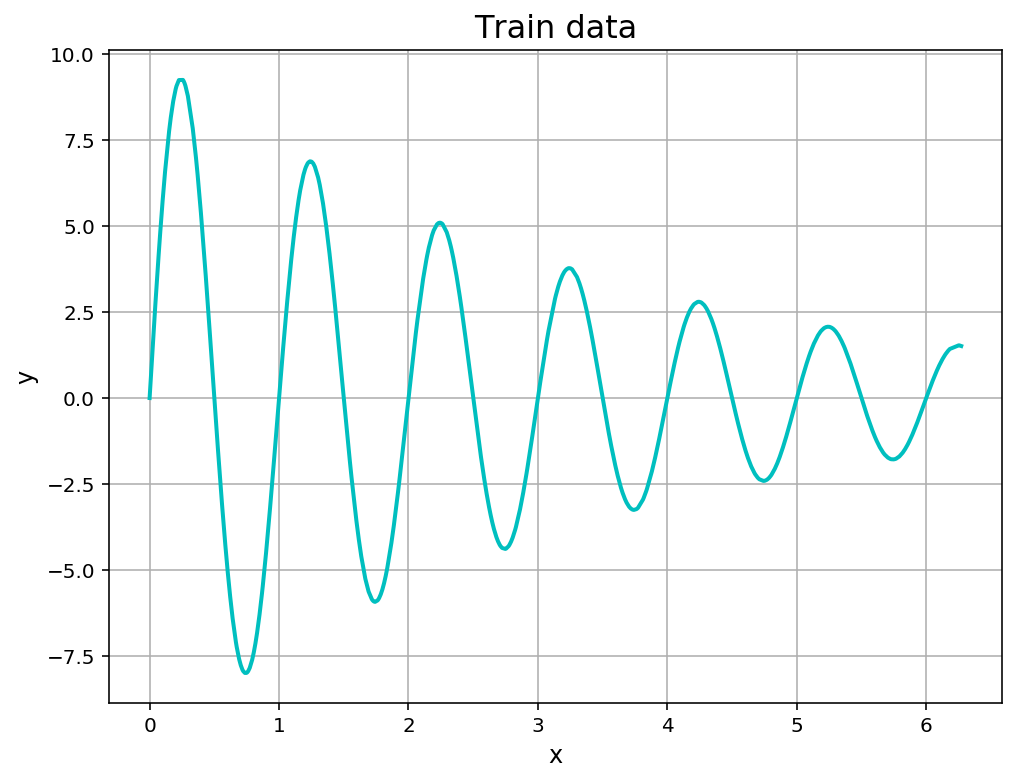

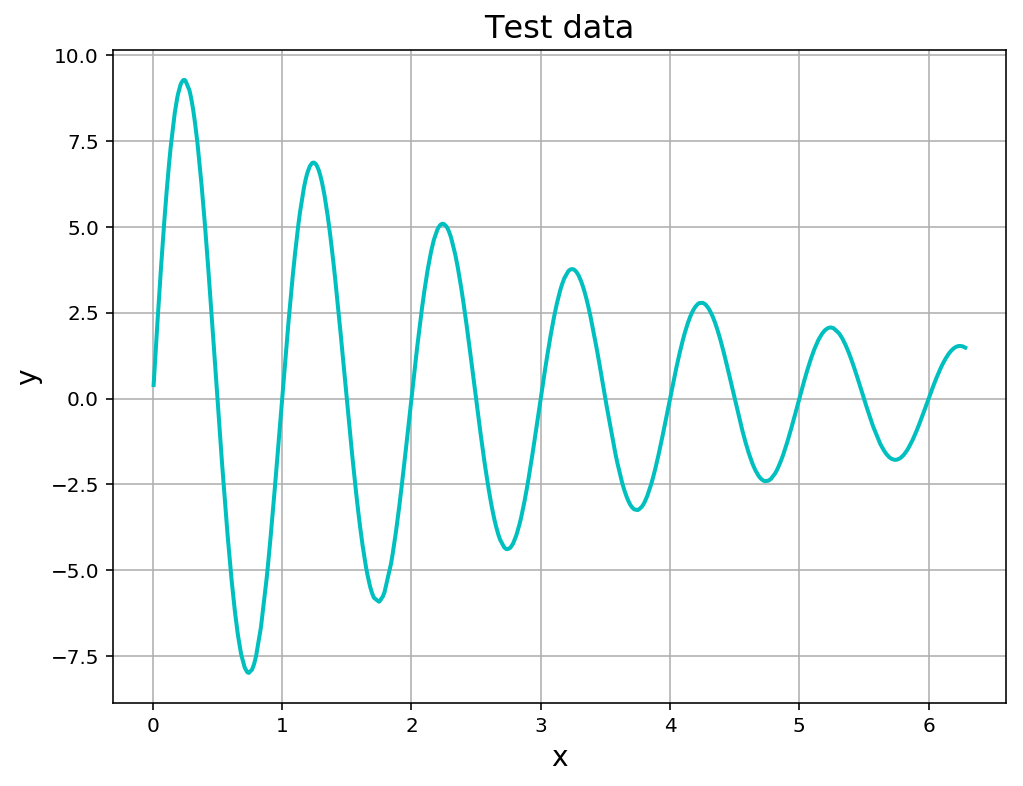

In [9]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(train_data.x,train_data.y,linewidth =2, color = 'c')
plt.title("Train data", fontsize = 16)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y", fontsize = 12)
plt.grid()
plt.show()
plt.plot(test_data.x,test_data.y,linewidth =2, color = 'c')
plt.title("Test data", fontsize = 16)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.grid()
plt.show()

### 1.4 Inject normally distributed noise to the training data

**Create a noise sequence** 

In [10]:
noise = np.random.normal(0, 1.0, train_data.shape[0])
noise = pd.Series(noise, name = 'noise')

**Add the noise to the training data**

In [11]:
train_data['y'] = train_data['y'] + noise

**Plot of the noisy training data**

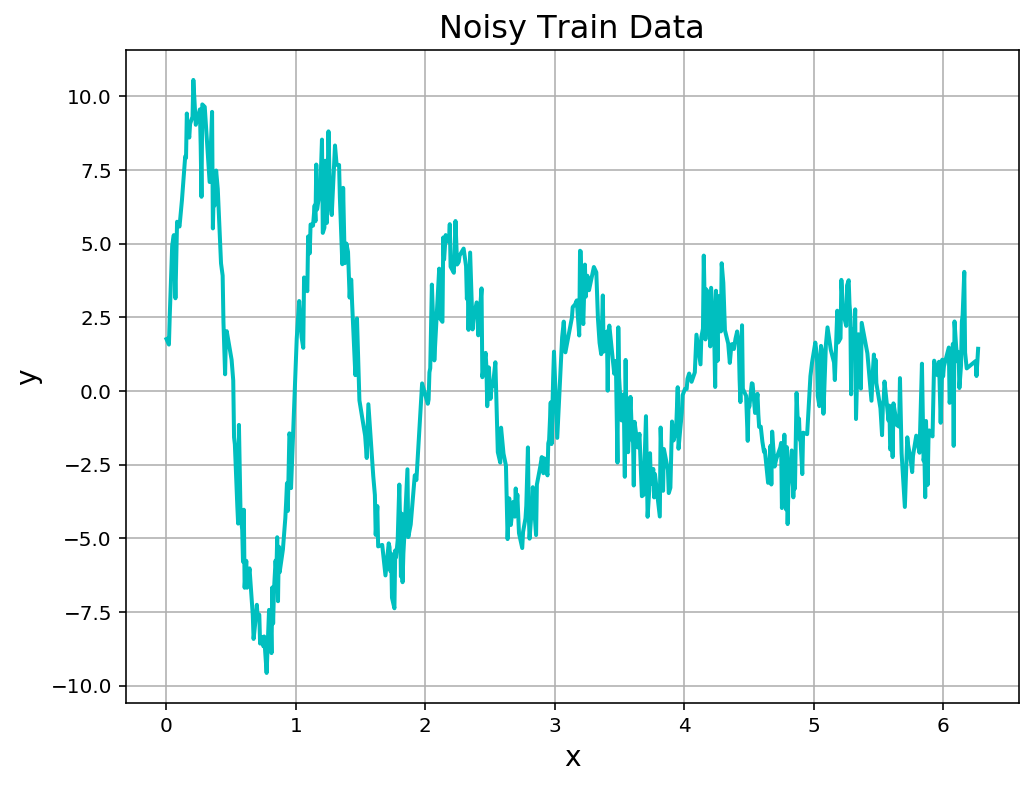

In [12]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(train_data.x,train_data.y,linewidth =2, color = 'c')
plt.title("Noisy Train Data", fontsize = 16)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.grid()
plt.show()

## 2. Plot model fits of kernel regressors having different bandwidths

### 2.1 Visualization function to plot model fits of kernel regressors having different bandwidths

In [13]:
def plot_model_fits_kernel_regressors(kernel, gamma_values, train_data, test_data,
                                     features, output, subplot_dimension): 

    '''
    A function which plots model fits of kernel regressors having different bandwidths
    Arguments:
    kernel - type of kernel of kernel regressor
    gamma_values - list of values of bandwidth/gamma
    train_data - a pandas dataframe containing training set
    test_data - a pandas dataframe containing test set
    features - list of features of the model (python list)
    output - name of output of the model (python string)
    subplot_dimension - dimension of subplot
    '''
    
    # extract the feature matrix and the output vector of train and test sets
    (X_train, y_train) = get_xy_data(train_data,features, output, False)
    (X_test, y_test) = get_xy_data(test_data,features, output, False)

    # iterate through each bandwidth
    for n, gamma in enumerate(gamma_values):
        # create model with the given kernel type and the gamma value
        model = kernel_regressor(kernel = kernel, gamma = gamma)
        # fit the model using the training data
        model.fit(X_train, y_train)
        # compute predictions using the test set
        predictions = model.predict(X_test)        
        # calculate the r-squared score
        score = r2_score(y_test, predictions)
        # subplot of test data and model fit
        plt.subplot(subplot_dimension[0], subplot_dimension[1], n+1)
        plt.plot(X_test, y_test, color = 'y', linewidth = 5, label = "test data")
        plt.plot(X_test, predictions, color = "k",linewidth = 2, label = "model fit")        
        plt.xlabel("x")
        plt.ylabel("y")  
        plt.legend()
        # display the gamma value and r-squared score in the title
        plt.title("gamma: " + str(gamma)+ ", r2_score: " +str(round(score,4)))                
        plt.grid()
     
    # adjust height and width space of the subplots
    plt.subplots_adjust(wspace = 0.45, hspace = 0.40)    
    # add the grand title to the whole figure
    plt.suptitle("Model fits of kernel regressors (kernel="+str(kernel)+") having different gamma values", fontsize = 22)        
    # show the plot         
    plt.show()     

### 2.2 Investigate model fits of kernel regressors with Gaussian kernel having different bandwidths/gamma values

**Create a list of gamma values**

In [14]:
gamma_values = [10,45,150,180,200,230,600,1200,2400,4800,9000,18000]

**Plots of model fits**

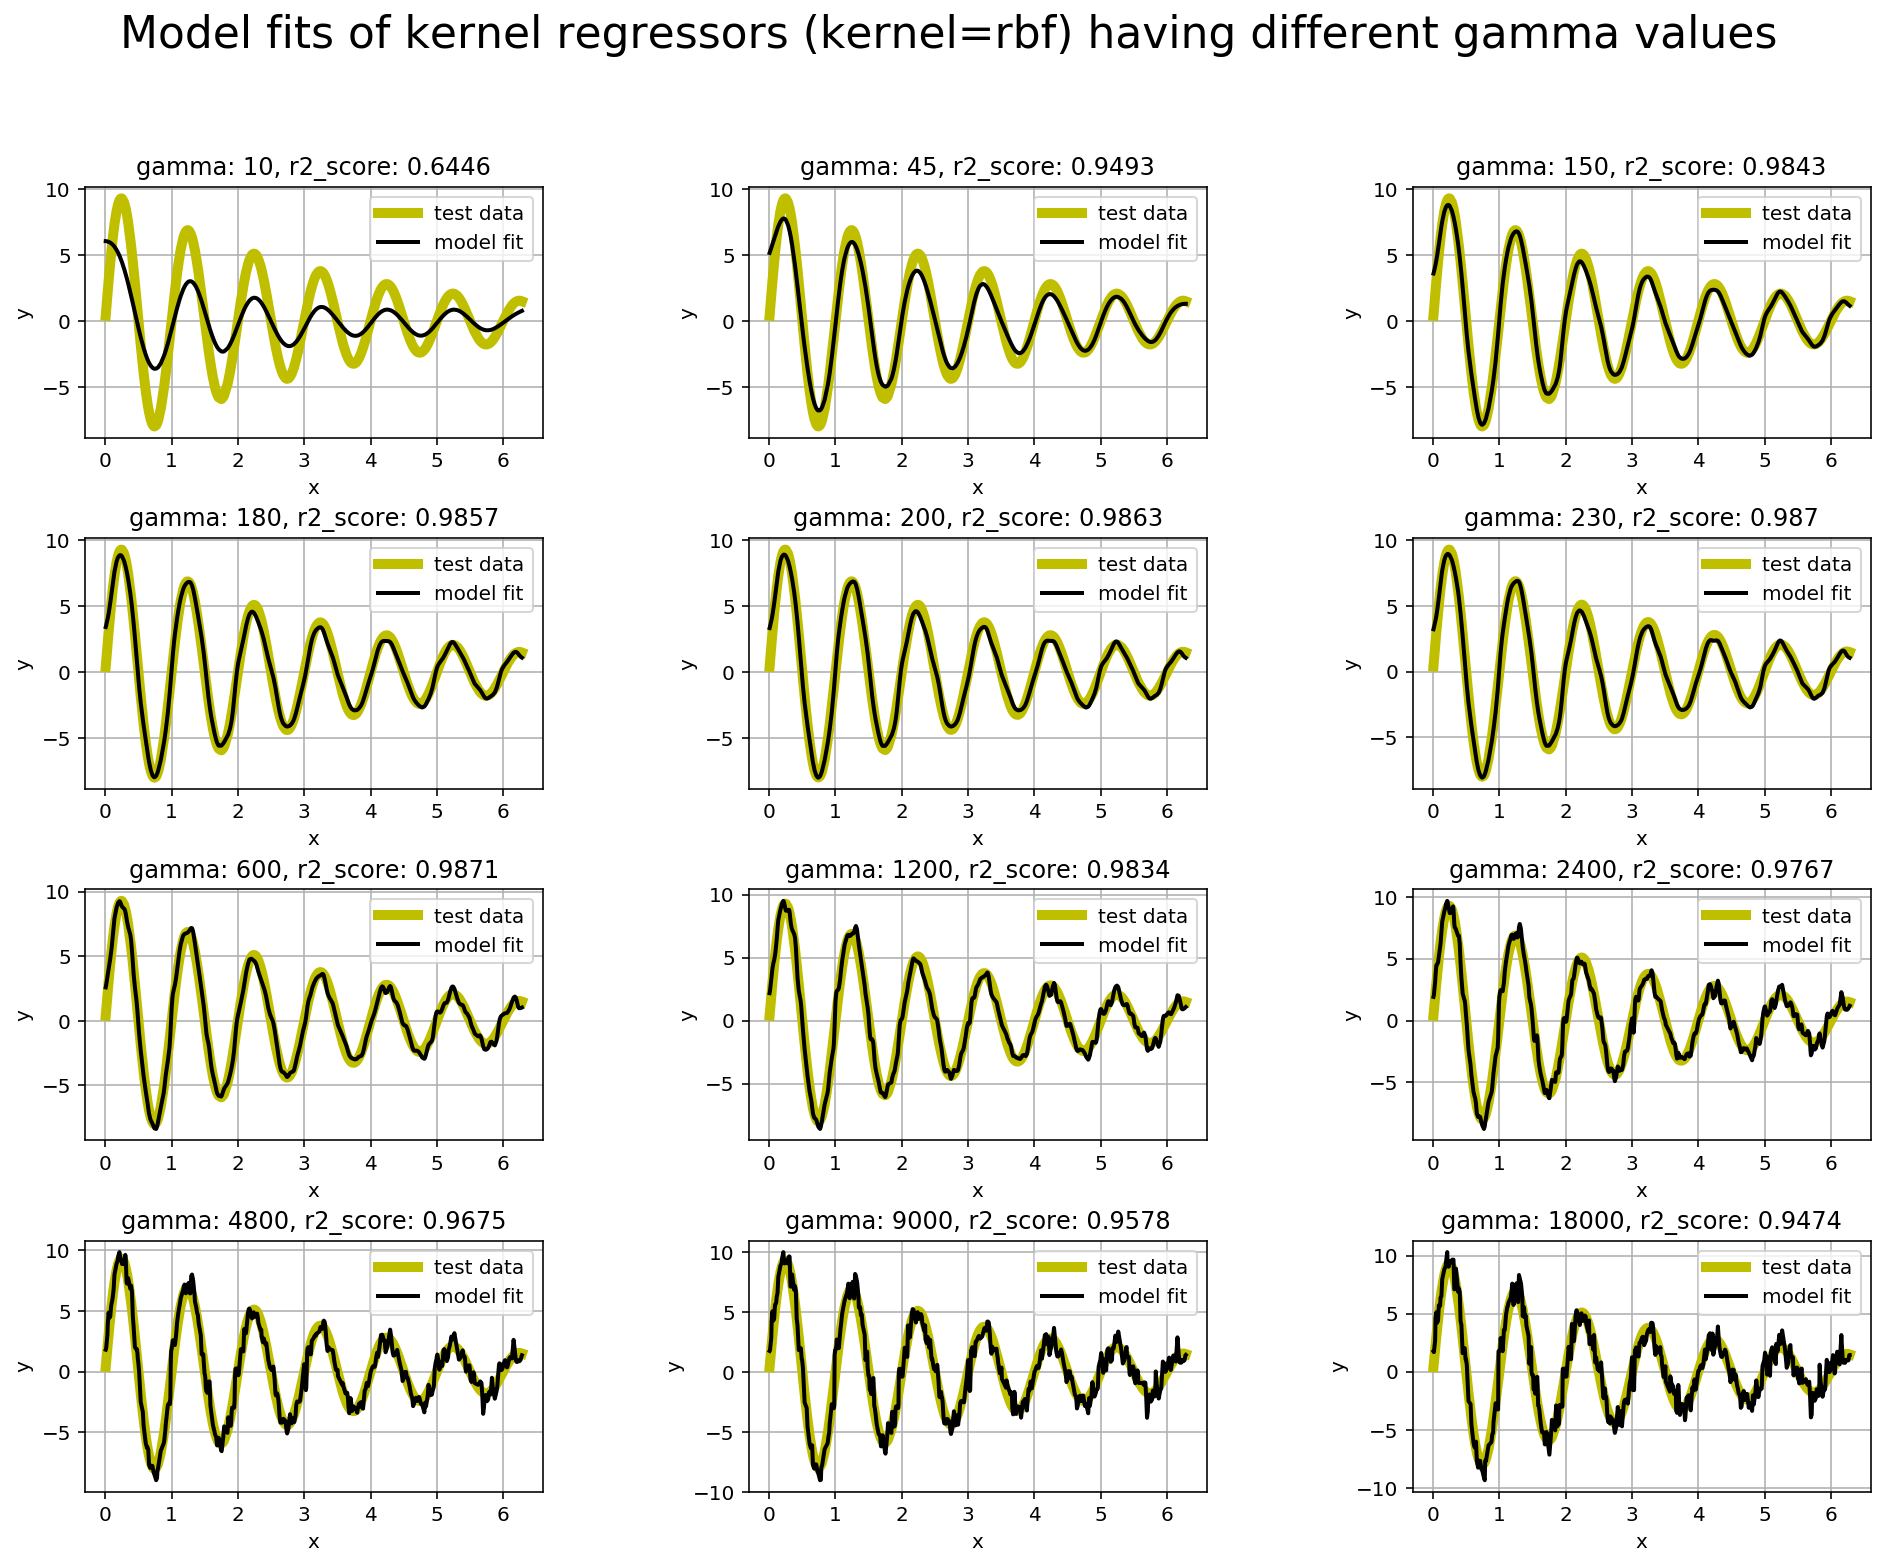

In [15]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
kernel = 'rbf'
plot_model_fits_kernel_regressors(kernel, gamma_values, train_data, test_data, ["x"], "y", [4,3])

### 2.3 Investigate model fits of kernel regressors with Laplacian kernels having different bandwidths/gamma values

**Create a list of gamma values**

In [16]:
gamma_values = [5,10,15,20,25,30,100,200,400,800,1600,3200]

**Plots of model fits**

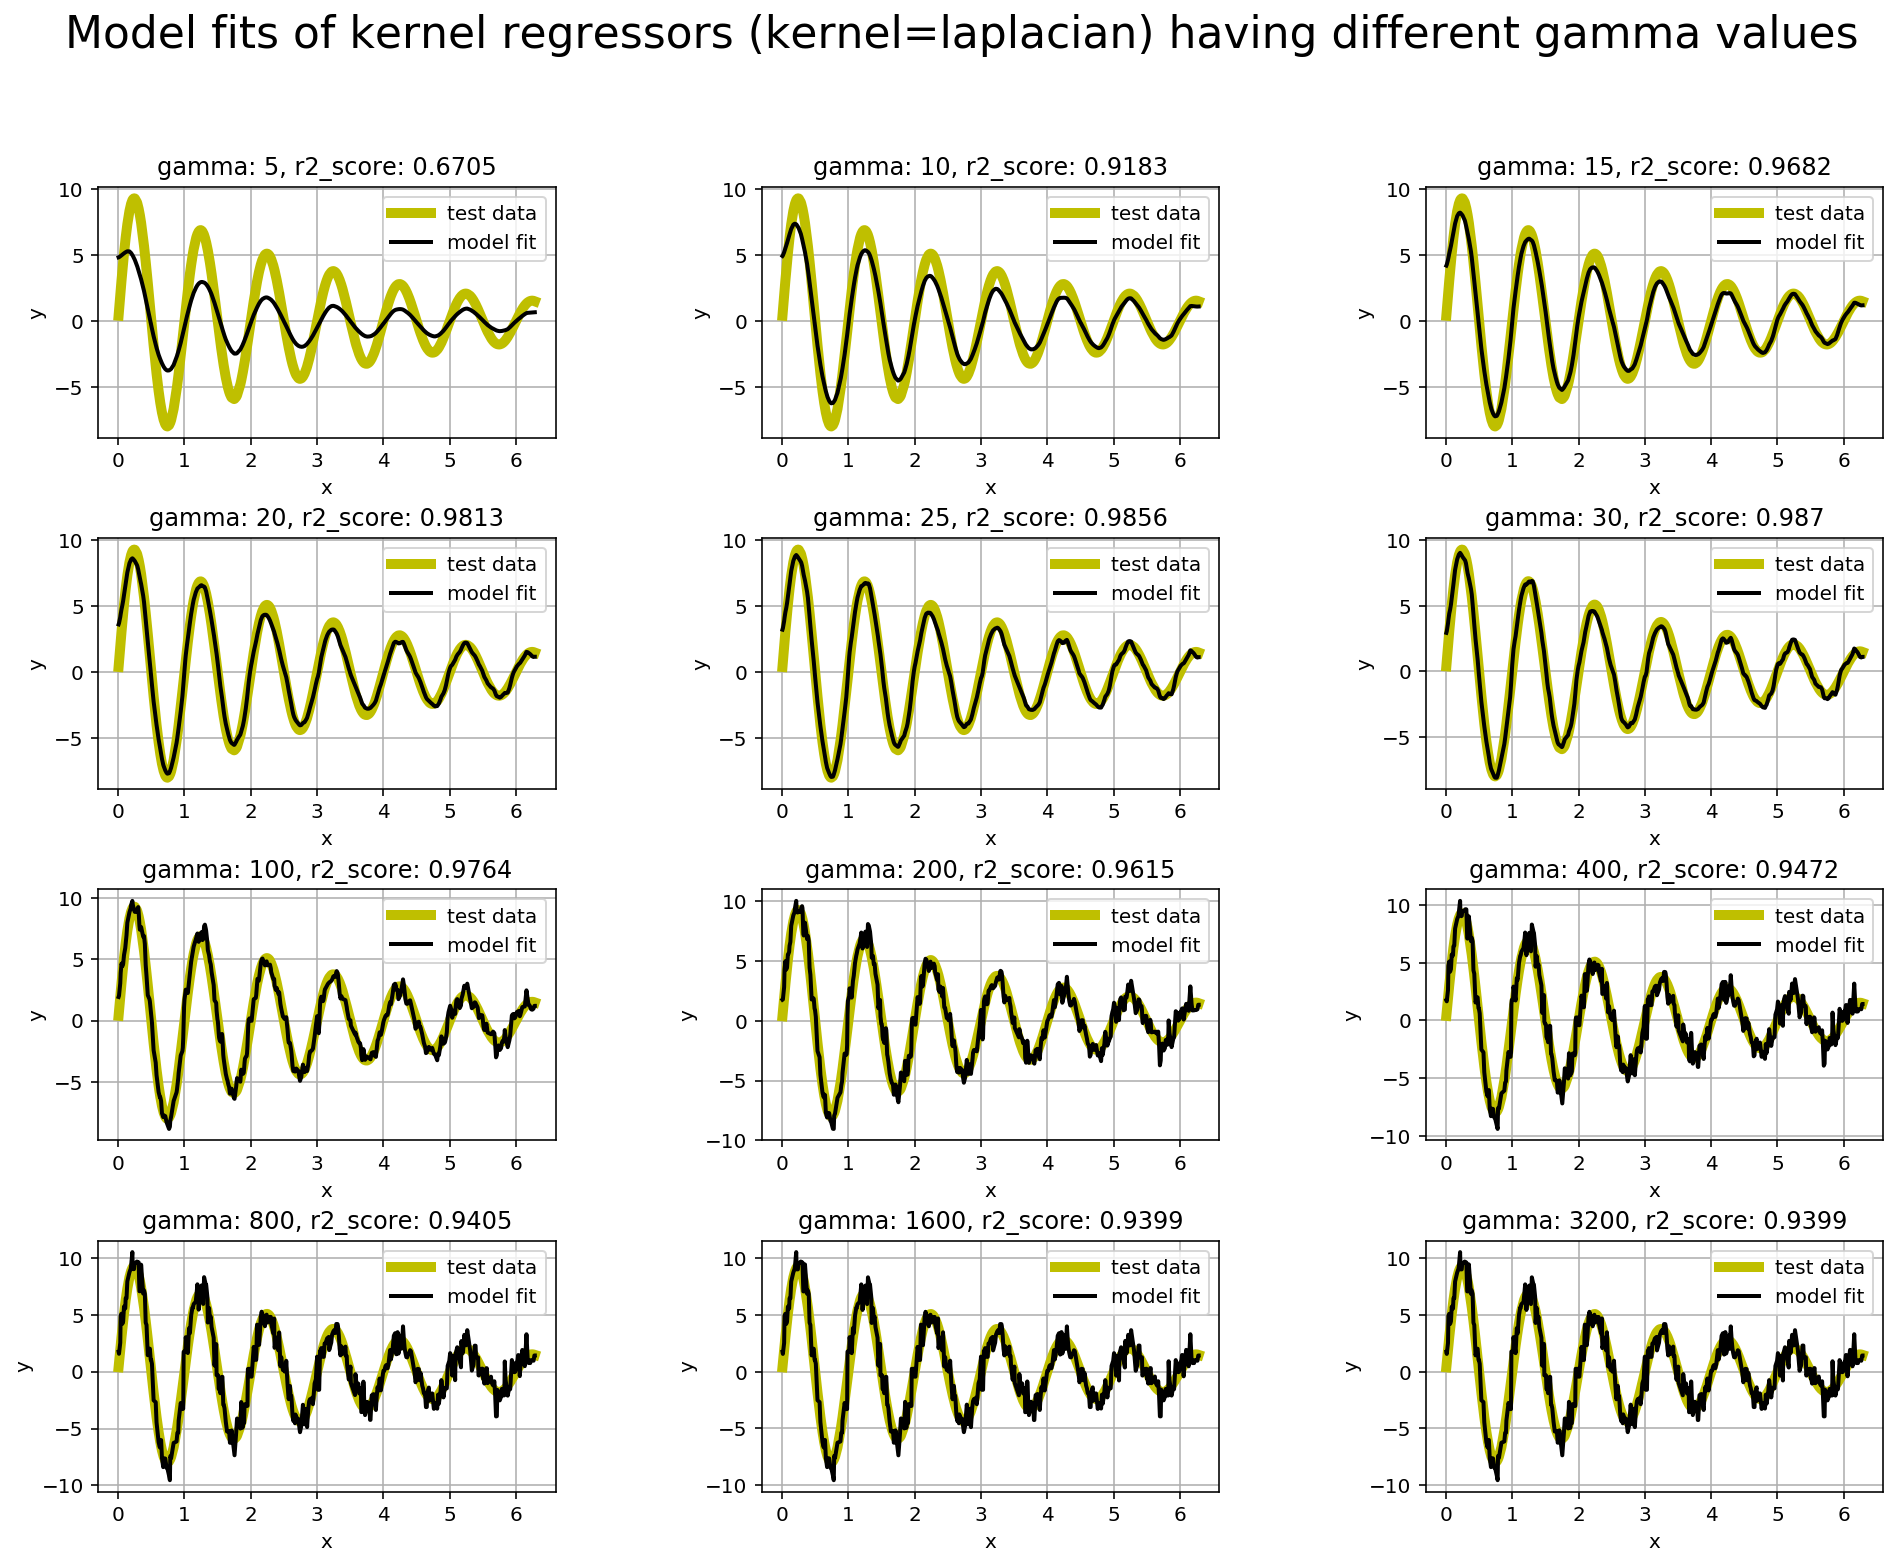

In [17]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
kernel = "laplacian"
plot_model_fits_kernel_regressors(kernel, gamma_values, train_data, test_data, ["x"], "y", [4,3])